<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Step 1: Business Understanding</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 2rem;
      line-height: 1.6;
      background-color: #f9f9f9;
    }
    h1 {
      font-size: 2rem;
    }
    h2 {
      font-size: 1.5rem;
      margin-top: 1.5rem;
    }
    ul {
      margin-top: 0.5rem;
      padding-left: 1.2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    .emoji {
      margin-right: 0.4rem;
    }
  </style>
</head>
<body>

  <h1><span class="emoji">🧠</span>Step 1: Business Understanding</h1>

  <h2><span class="emoji">🎯</span>Objective:</h2>
  <p>
    Create a recommendation system that finds the top 5 players most similar to a given player based on various performance and physical characteristics.
  </p>

  <h2><span class="emoji">✅</span>Questions to answer:</h2>
  <ul>
    <li>Who will use this system? (Analysts, scouts, gamers?)</li>
    <li>What kind of similarity matters? (Skill stats, physical stats, both?)</li>
    <li>Do we want to include all players or only by position, age group, etc.?</li>
  </ul>

</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Step 2: Data Understanding</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 2rem;
      line-height: 1.6;
      background-color: #f9f9f9;
    }
    h1 {
      font-size: 2rem;
    }
    h2 {
      font-size: 1.5rem;
      margin-top: 1.5rem;
    }
    ul {
      margin-top: 0.5rem;
      padding-left: 1.2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    .emoji {
      margin-right: 0.4rem;
    }
  </style>
</head>
<body>

  <h1><span class="emoji">📊</span>Step 2: Data Understanding</h1>

  <h2><span class="emoji">✅</span>Actions:</h2>
  <ul>
    <li>Load the dataset (CSV or Excel).</li>
    <li>Understand column types: numeric, categorical, text.</li>
    <li>Identify missing values.</li>
    <li>Explore unique values in key columns (Foot, Team & Contract, Body_type, etc.).</li>
  </ul>

</body>
</html>


In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("SOFIFA_17_Jan_2024.csv")

# Print the shape of the DataFrame
print("DataFrame Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("-" * 50)

# Print the column names
print("Columns in the DataFrame:")
print(df.columns)
print("-" * 50)



DataFrame Shape:
Rows: 9150, Columns: 79
--------------------------------------------------
Columns in the DataFrame:
Index(['Image_URL', 'Name', 'Age', 'Overall_rating', 'Potential',
       'Team&Contract', 'ID', 'Height', 'Weight', 'Foot', 'Best_Overall',
       'Best_Position', 'Growth', 'Joined', 'Loan_date_end', 'Value', 'Wage',
       'Release_clause', 'Total_attacking', 'Crossing', 'Finishing',
       'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control',
       'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility',
       'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping',
       'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
       'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
       'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle',
       'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking',
       'GK_Positionin

In [4]:
# Print data types of each column
print("Data Types of Columns:")
df.dtypes


Data Types of Columns:


Image_URL                object
Name                     object
Age                     float64
Overall_rating          float64
Potential               float64
                         ...   
Traits.1                float64
PlayStyles               object
PlayStyles +             object
Number_of_playstyles    float64
Acceleration_type        object
Length: 79, dtype: object

In [5]:
# Print the count of missing values per column
print("Missing Values Count per Column:")
print(df.isnull().sum())
print("-" * 50)




Missing Values Count per Column:
Image_URL                488
Name                     150
Age                      150
Overall_rating           150
Potential                150
                        ... 
Traits.1                9150
PlayStyles              2187
PlayStyles +            9062
Number_of_playstyles     150
Acceleration_type        150
Length: 79, dtype: int64
--------------------------------------------------


In [6]:
# Print the first few rows of the DataFrame
print("First 5 Rows of the DataFrame:")
print(df.head())
print("-" * 50)

First 5 Rows of the DataFrame:
                                           Image_URL                 Name  \
0  https://cdn.sofifa.net/players/239/085/24_60.p...                  NaN   
1  https://cdn.sofifa.net/players/239/085/24_60.p...        E. Haaland ST   
2  https://cdn.sofifa.net/players/239/085/24_60.p...      K. Mbappé ST LW   
3  https://cdn.sofifa.net/players/239/085/24_60.p...  K. De Bruyne CM CAM   
4  https://cdn.sofifa.net/players/239/085/24_60.p...           H. Kane ST   

    Age  Overall_rating  Potential                     Team&Contract  \
0   NaN             NaN        NaN                               NaN   
1  22.0            91.0       94.0      Manchester City\n2022 ~ 2027   
2  24.0            91.0       94.0  Paris Saint-Germain\n2018 ~ 2024   
3  32.0            91.0       91.0      Manchester City\n2015 ~ 2025   
4  29.0            90.0       90.0    FC Bayern München\n2023 ~ 2027   

         ID         Height         Weight   Foot  ...  Passing / Kicking 

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending', 'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats', 'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']


In [8]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['Image_URL', 'Name', 'Team&Contract', 'Height', 'Weight', 'Foot', 'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']


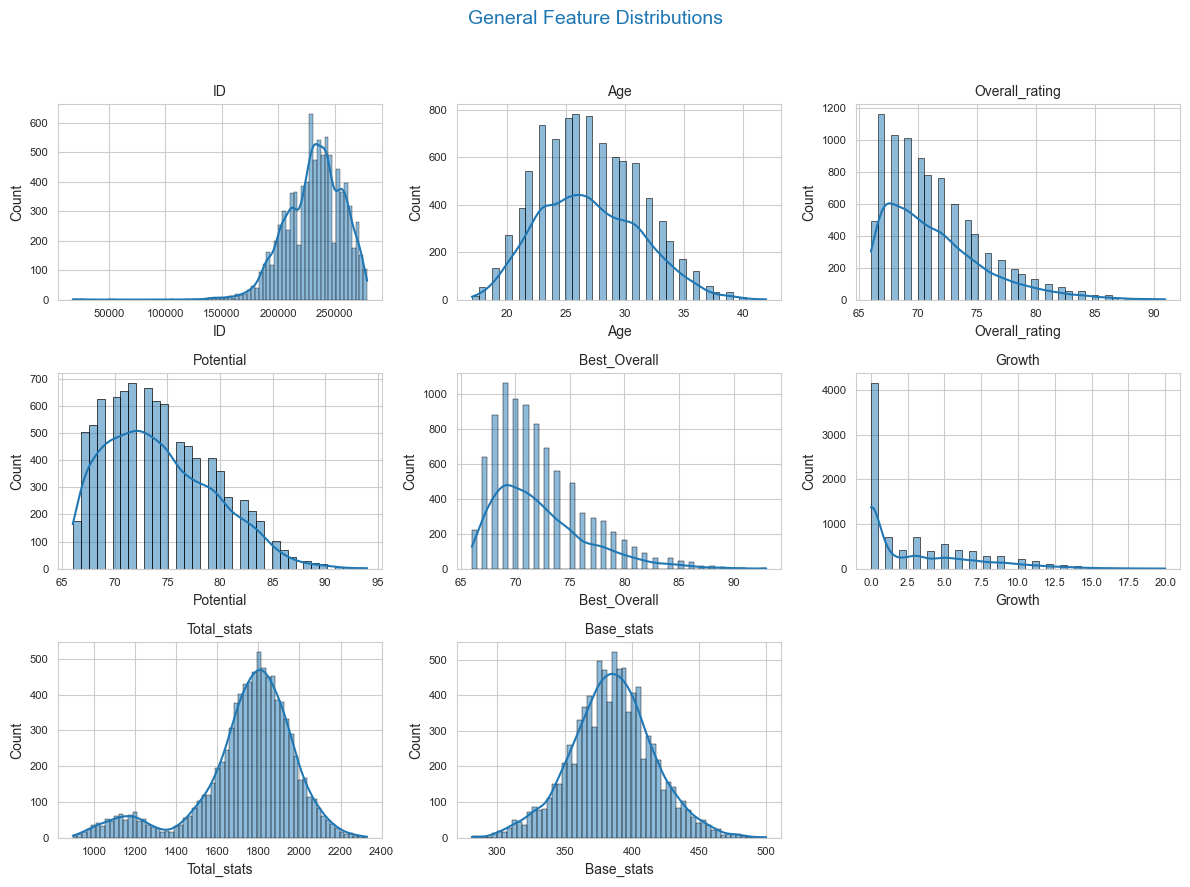

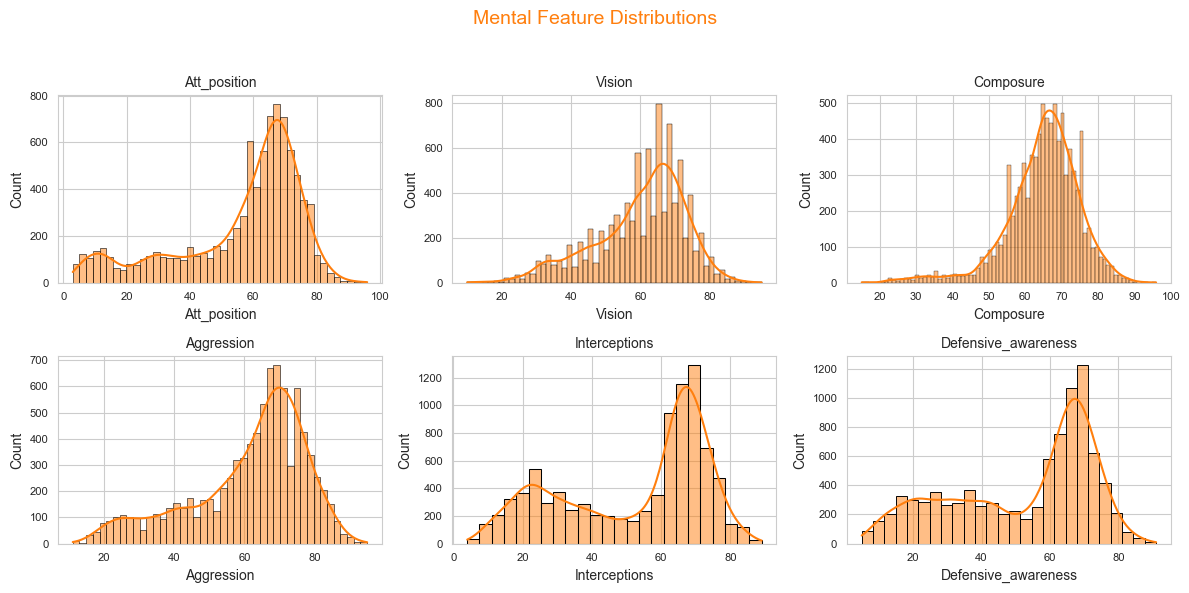

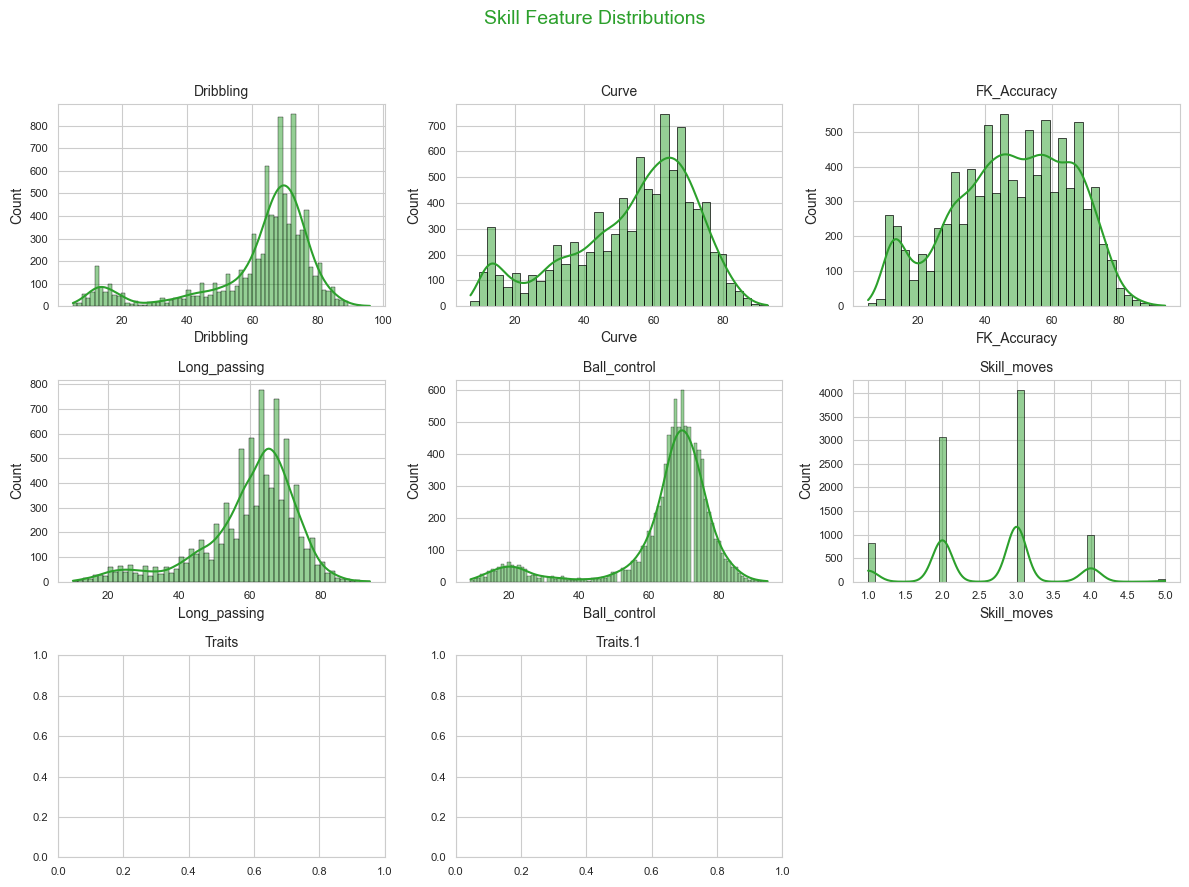

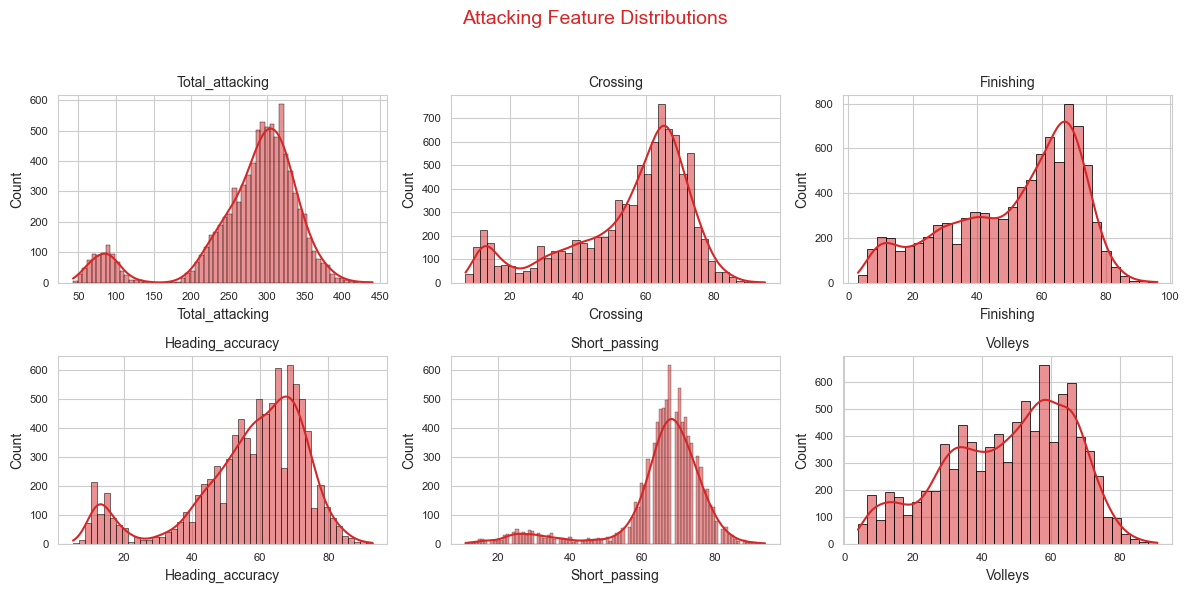

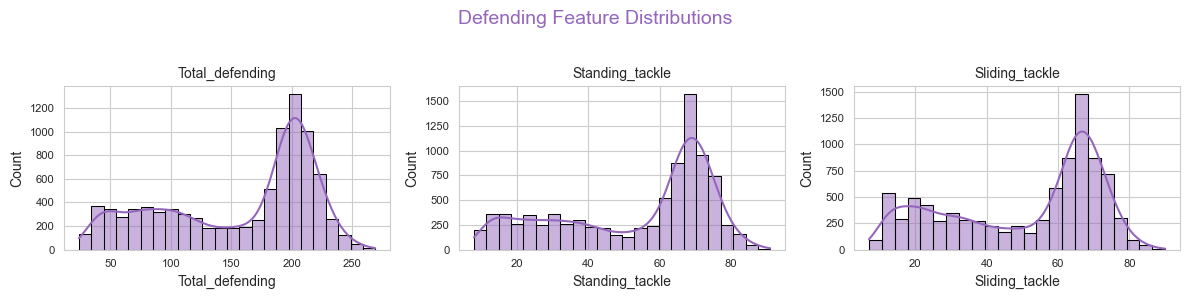

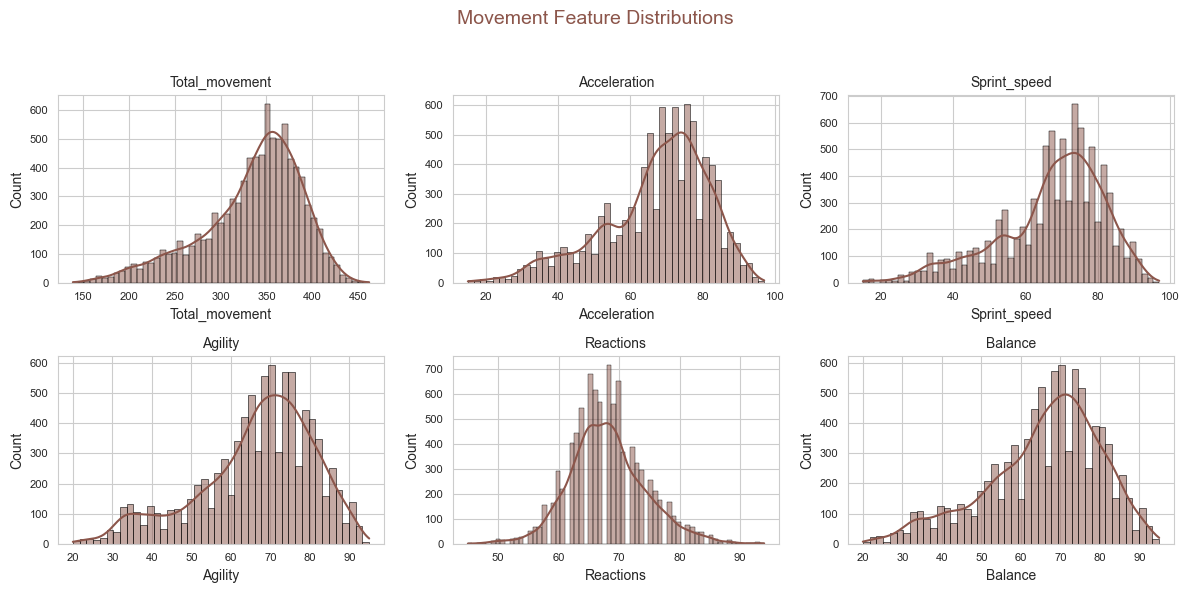

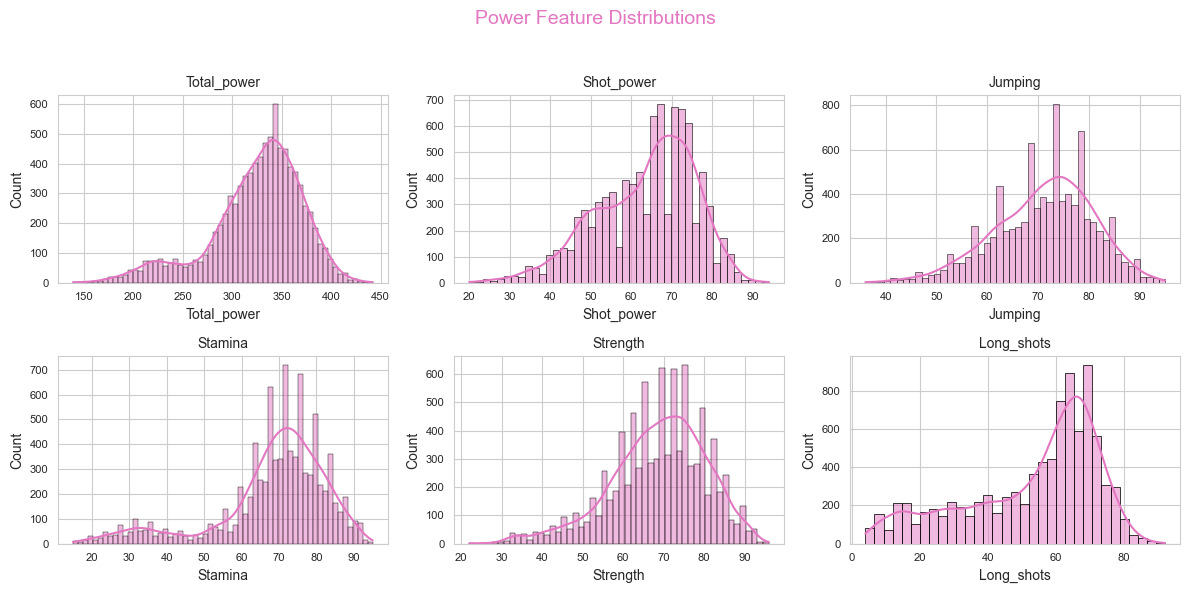

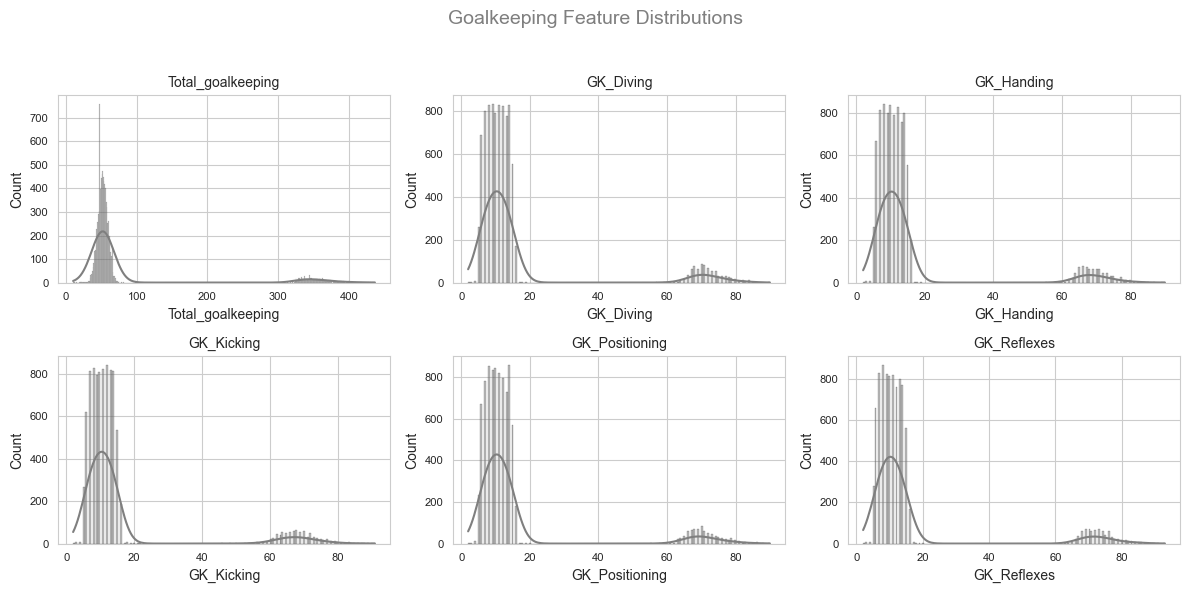

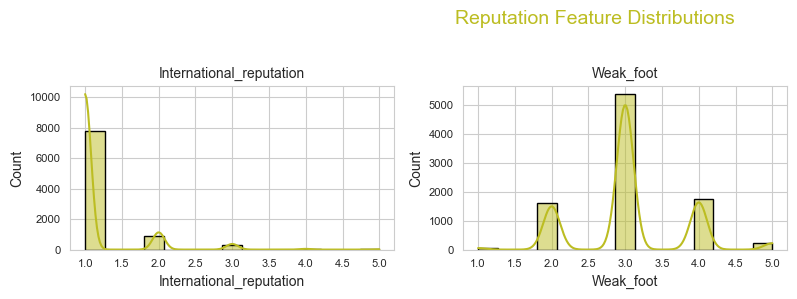

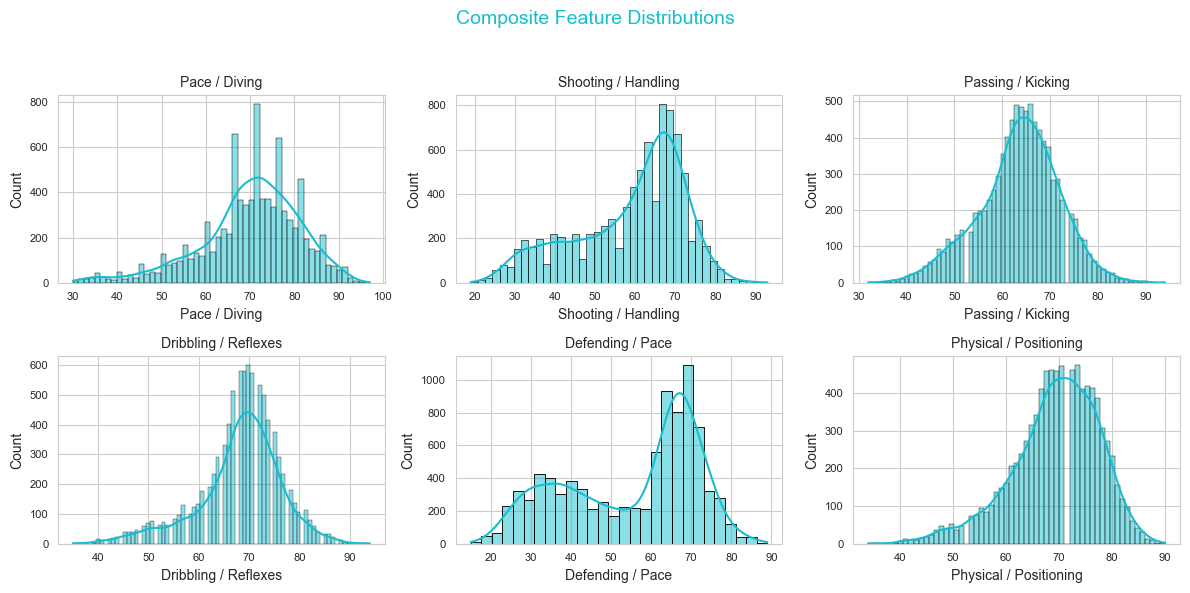

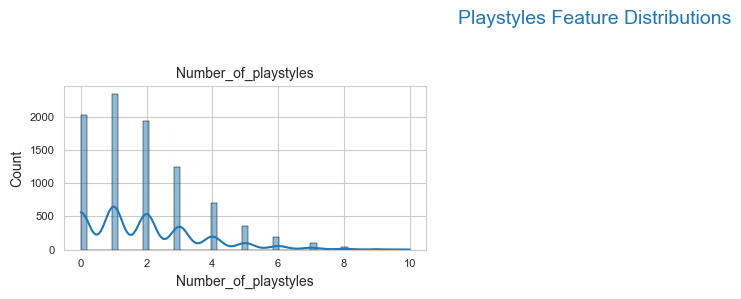

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define numerical features and categories
numerical_features = ['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking',
                      'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
                      'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement',
                      'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power',
                      'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
                      'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
                      'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping',
                      'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
                      'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving',
                      'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace',
                      'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']

feature_groups = {
    'General': ['ID', 'Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Category-specific color palettes (optional tweak)
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: all features per group side by side
for group_name, features in filtered_feature_groups.items():
    n = len(features)
    cols = 3  # number of subplots per row
    rows = (n + cols - 1) // cols  # compute needed rows

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    fig.suptitle(f'{group_name} Feature Distributions', fontsize=14, color=group_color_map[group_name])
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(df[feature].dropna(), kde=True, ax=axes[i],
                     color=group_color_map[group_name], edgecolor='black')
        axes[i].set_title(feature, fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


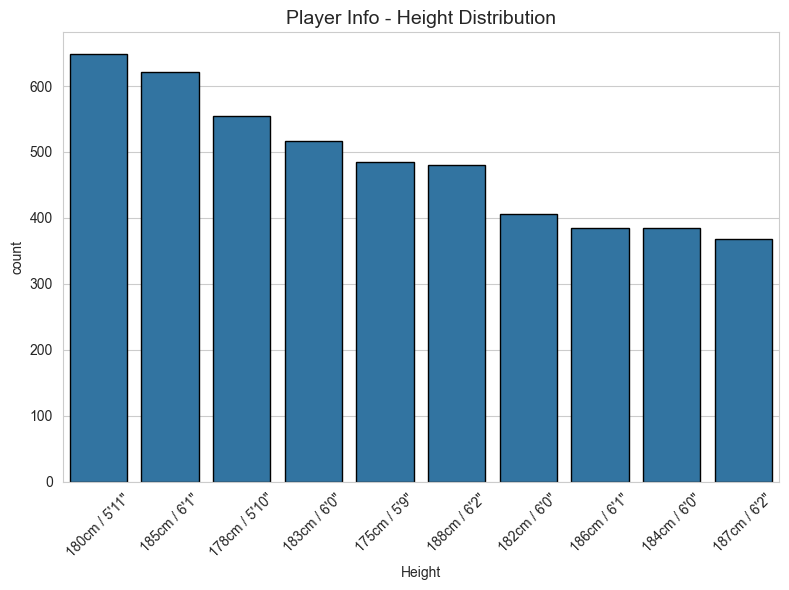

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


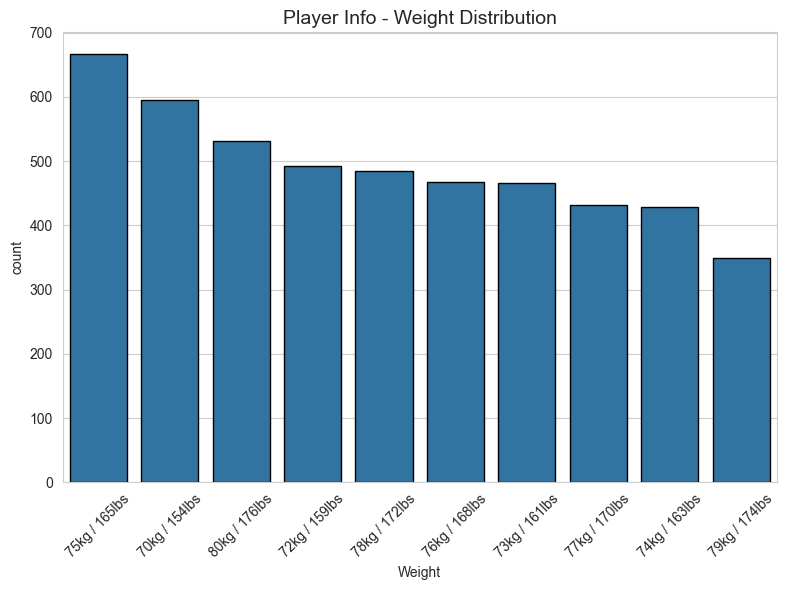

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


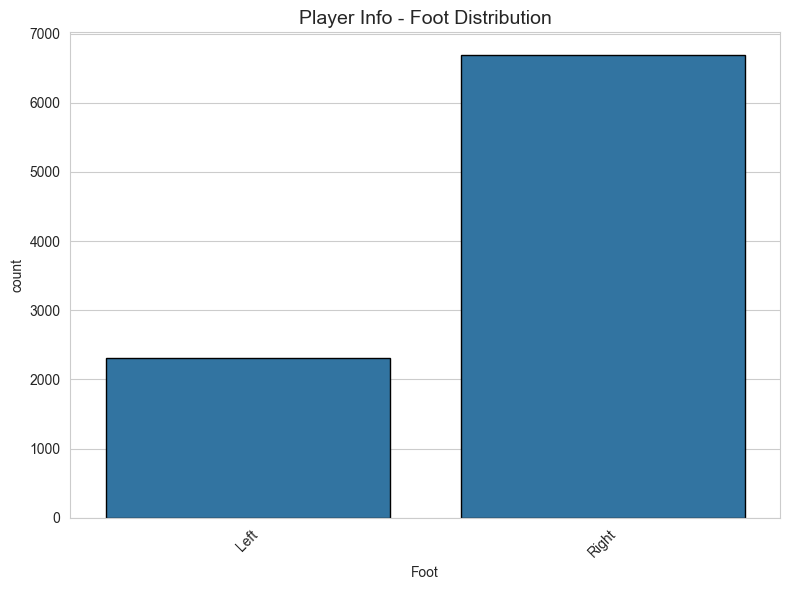

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


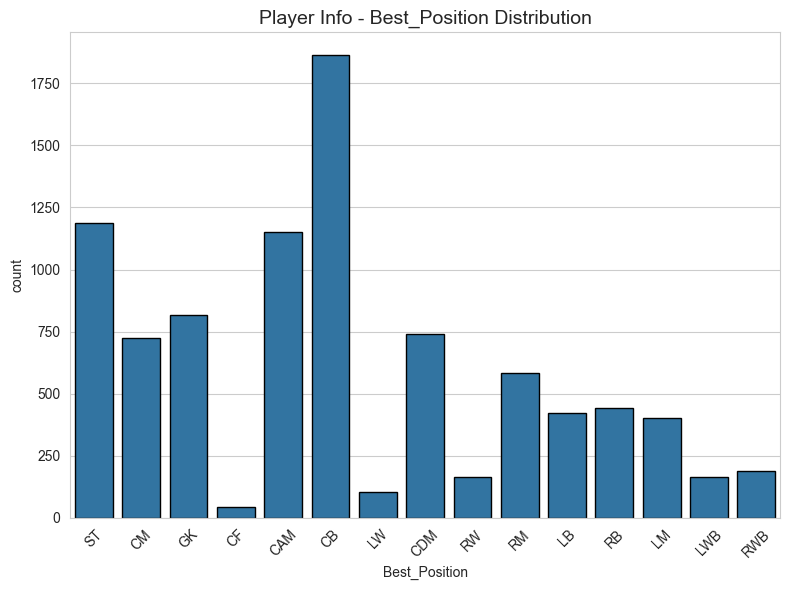

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


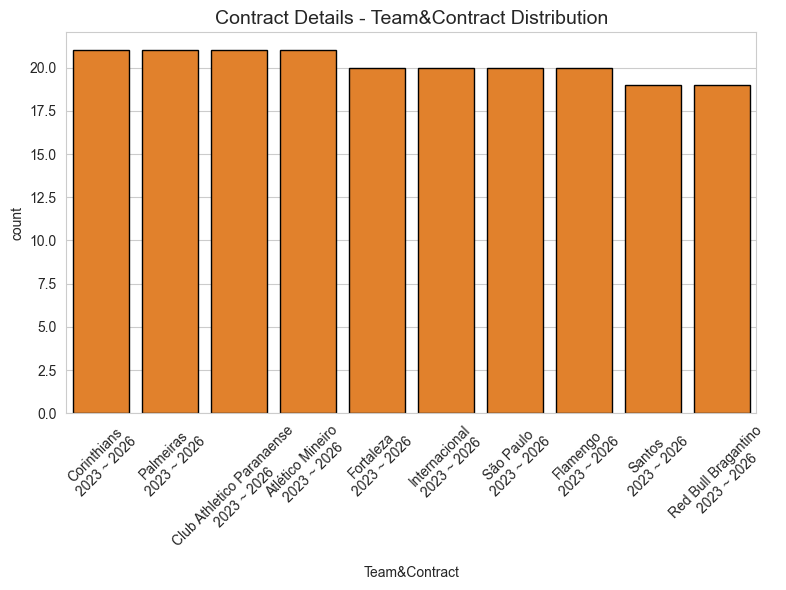

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


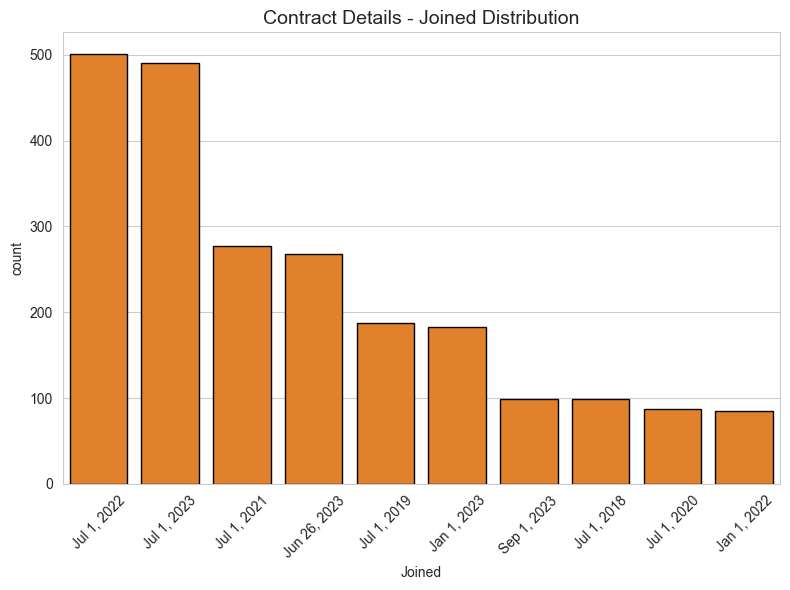

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


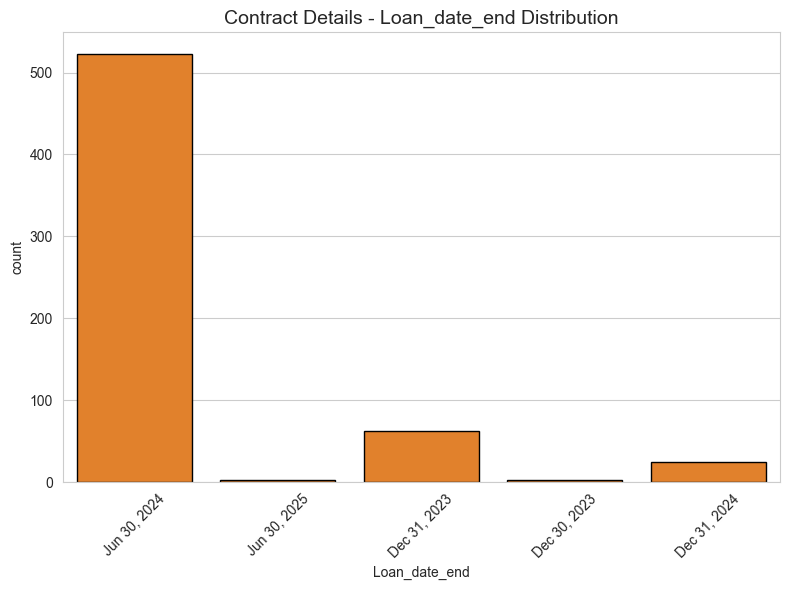

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


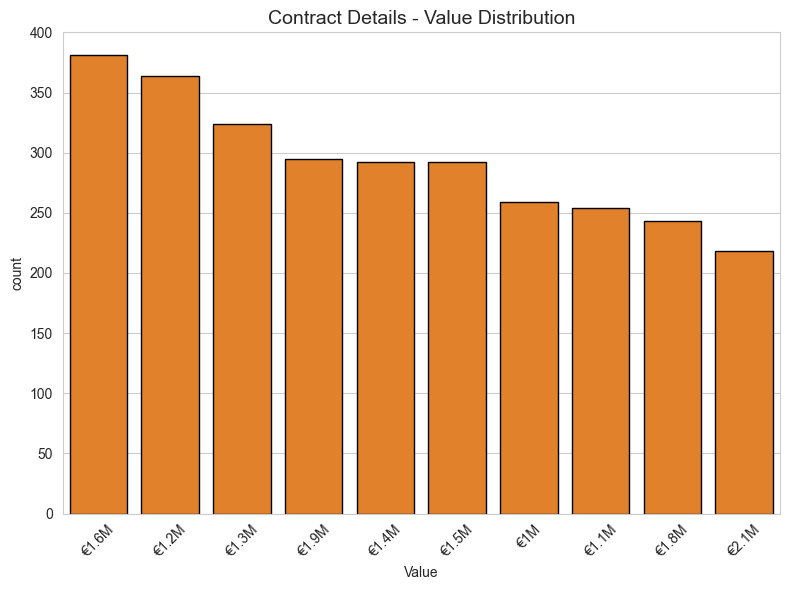

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


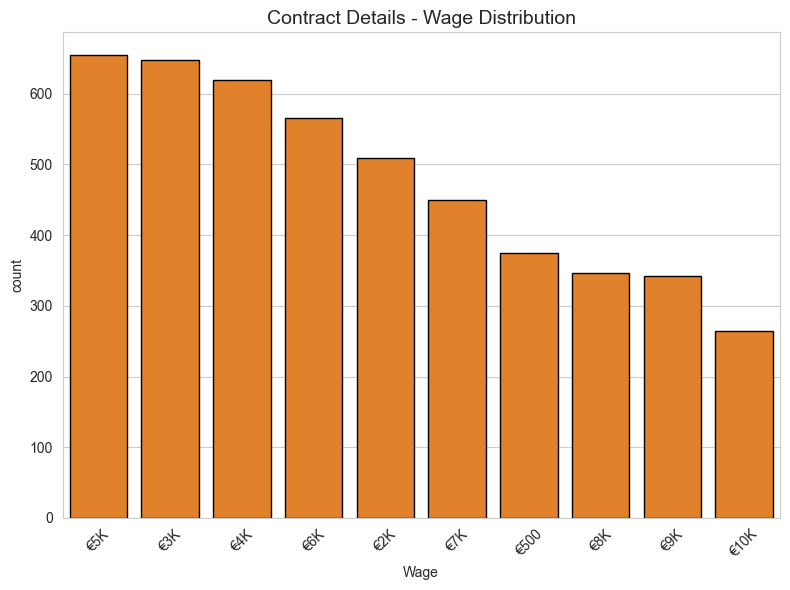

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


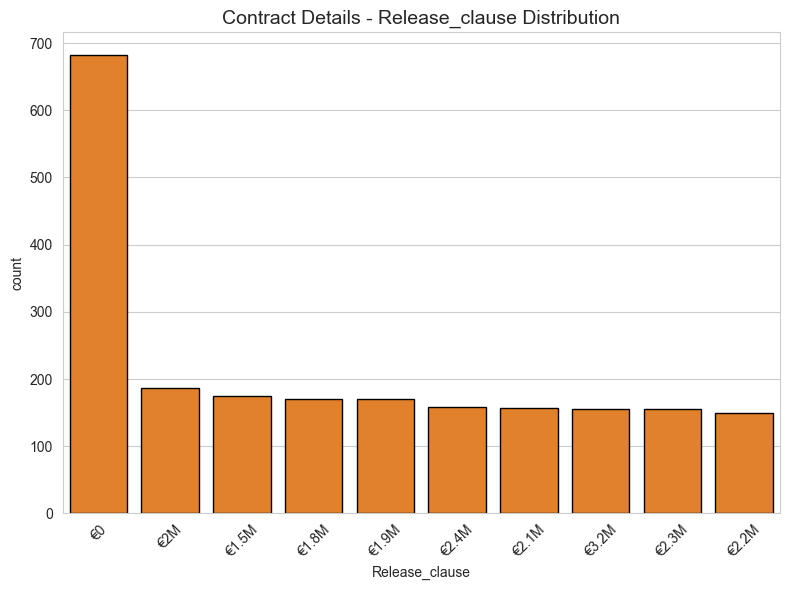

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


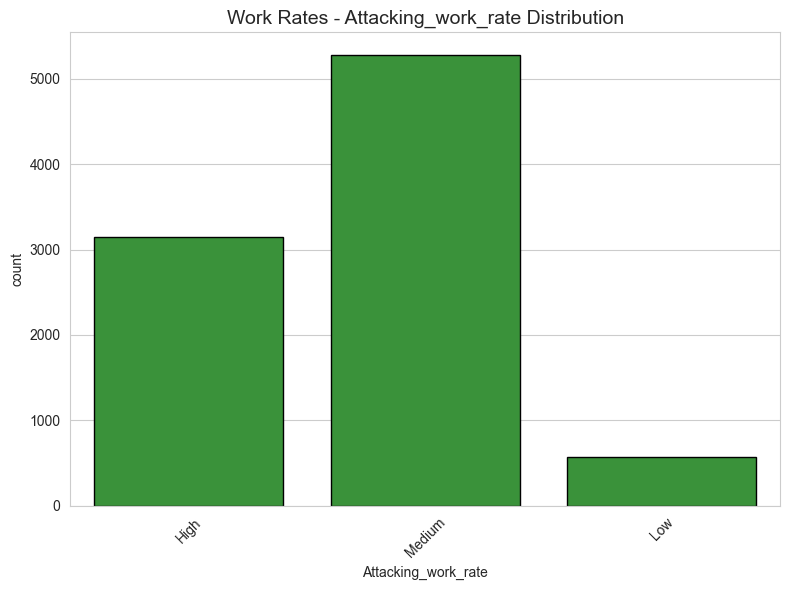

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


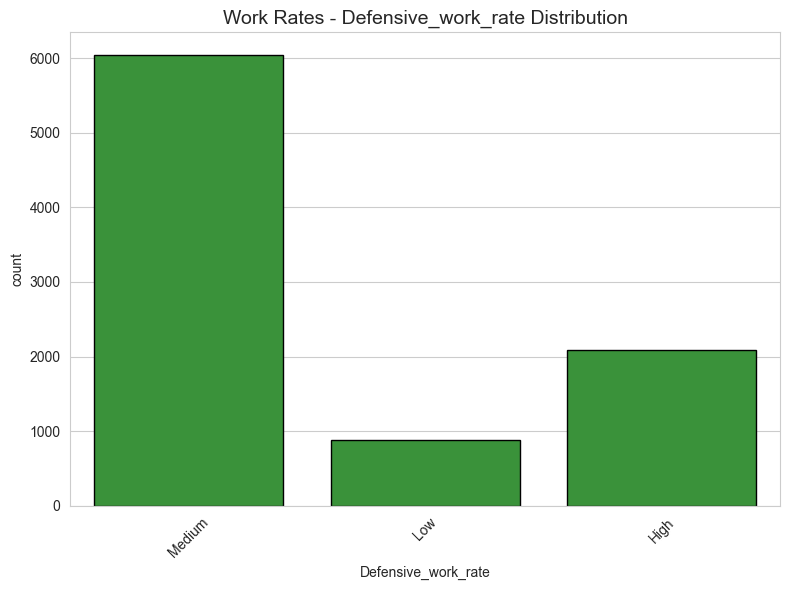

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


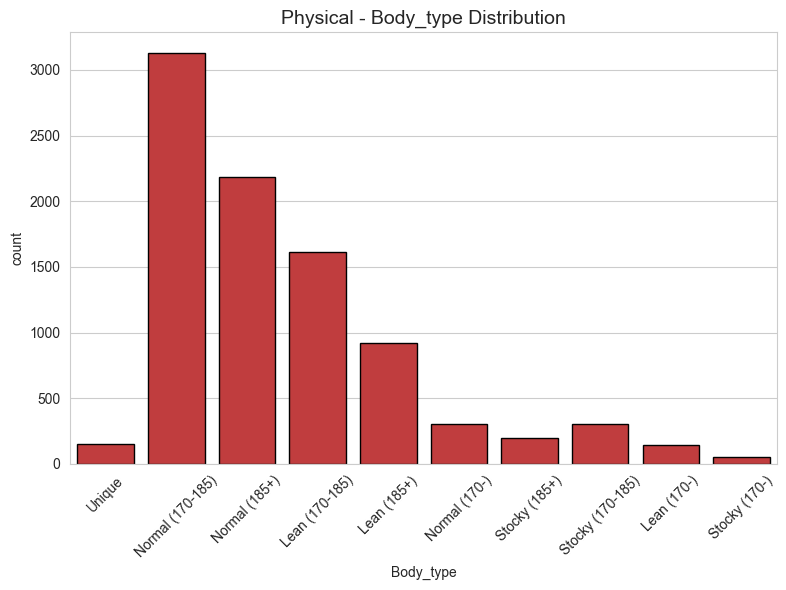

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


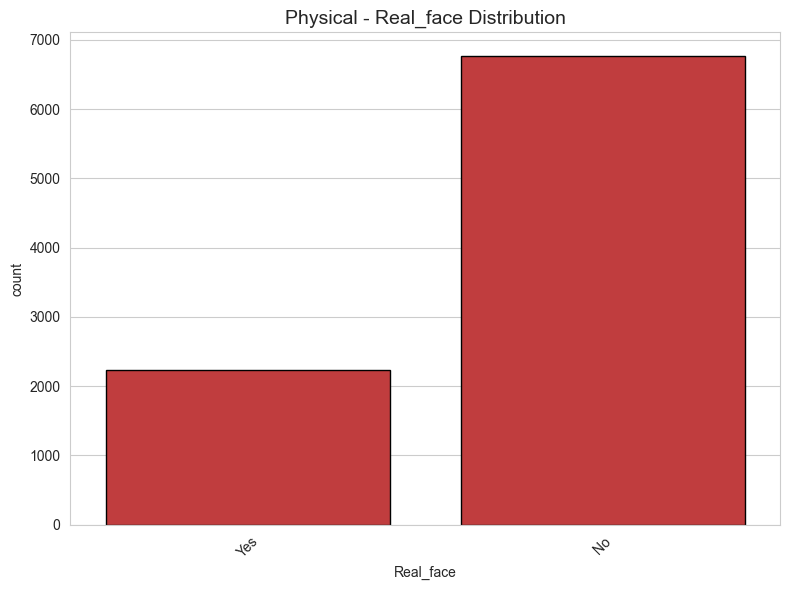

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


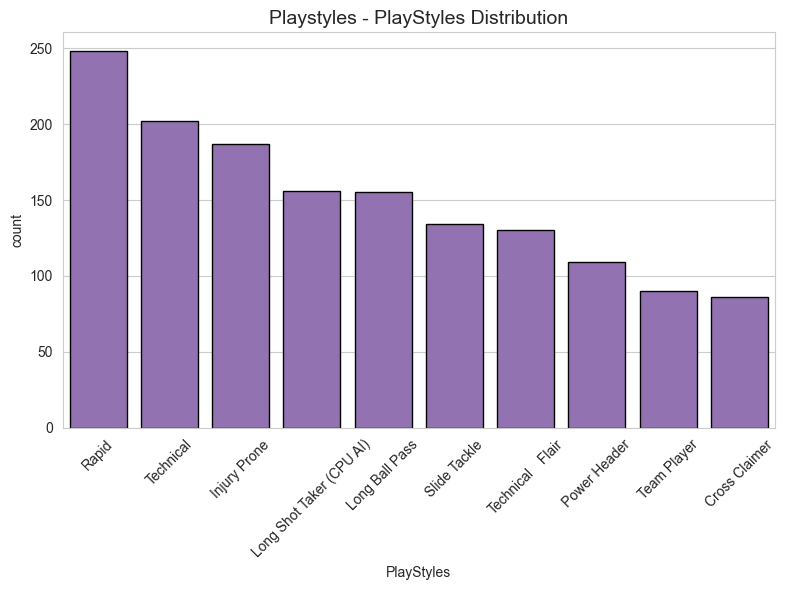

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


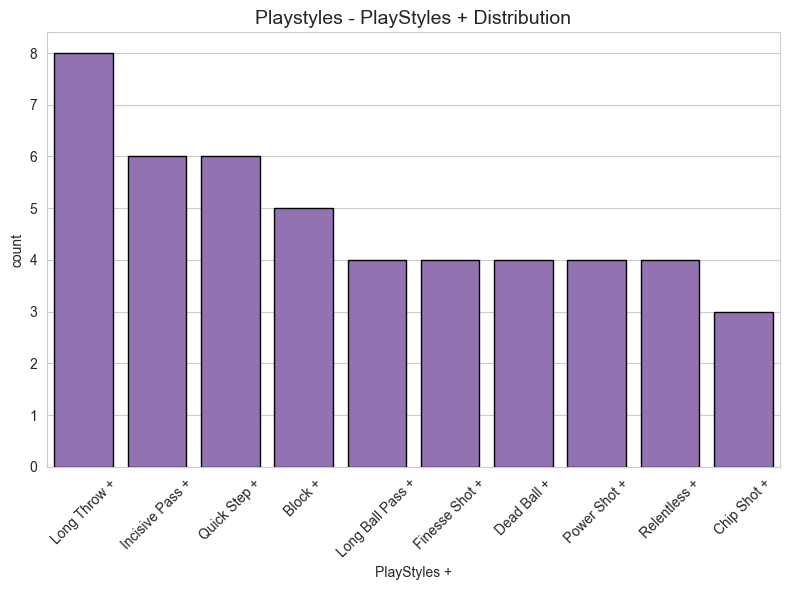

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


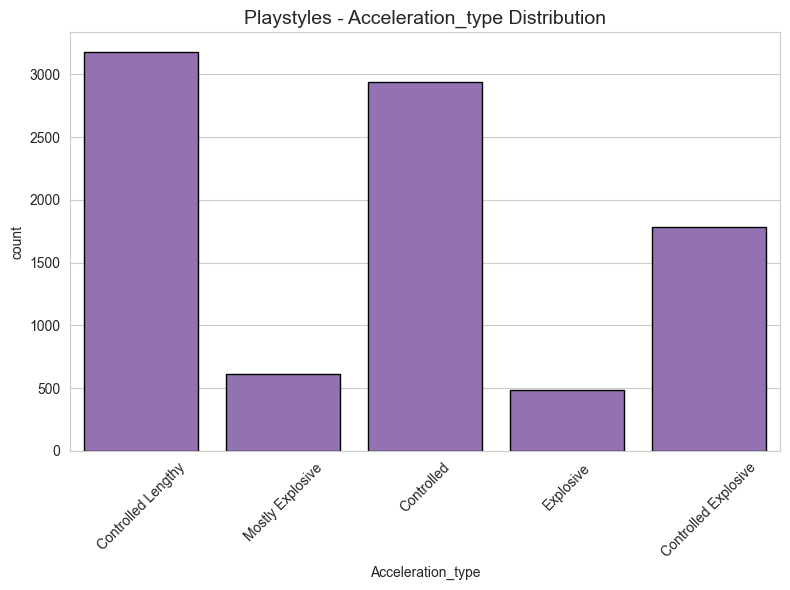

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define categorical features and categories
categorical_features = ['Team&Contract', 'Height', 'Weight', 'Foot', 
                        'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 
                        'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 
                        'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']

feature_groups = {
    'Player Info': [ 'Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Category-specific color palettes
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: each feature in a separate figure, one under the other
for group_name, features in filtered_feature_groups.items():
    for feature in features:
        # Create a new figure for each plot (one under the other)
        plt.figure(figsize=(8, 6))  # Adjusting the overall figure size
        
        # Only show the top 10 categories if there are more than 20 unique categories
        if df[feature].nunique() > 20:
            top_categories = df[feature].value_counts().nlargest(10).index
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
        else:
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
        
        plt.title(f'{group_name} - {feature} Distribution', fontsize=14)
        plt.tick_params(axis='x', labelsize=10, rotation=45)  # Rotate x-axis labels if needed
        plt.tick_params(axis='y', labelsize=10)
        plt.tight_layout()
        plt.show()


In [13]:
# Dropping the specified columns from the DataFrame
df = df.drop(columns=['Image_URL', 'Name', 'ID', 'Traits', 'Traits.1'])

# Verify that the columns have been dropped
print(df.columns)


Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate',
       'Defensive_work_rate', 'International_r

In [14]:
import pandas as pd

# Replace missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing values in categorical columns with the most frequent value (mode)
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm that missing values are replaced
print("Missing values after replacement:")
print(df.isnull().sum())


Missing values after replacement:
Age                       0
Overall_rating            0
Potential                 0
Team&Contract             0
Height                    0
                         ..
Physical / Positioning    0
PlayStyles                0
PlayStyles +              0
Number_of_playstyles      0
Acceleration_type         0
Length: 74, dtype: int64


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/1234393075.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_37462/1234393075.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

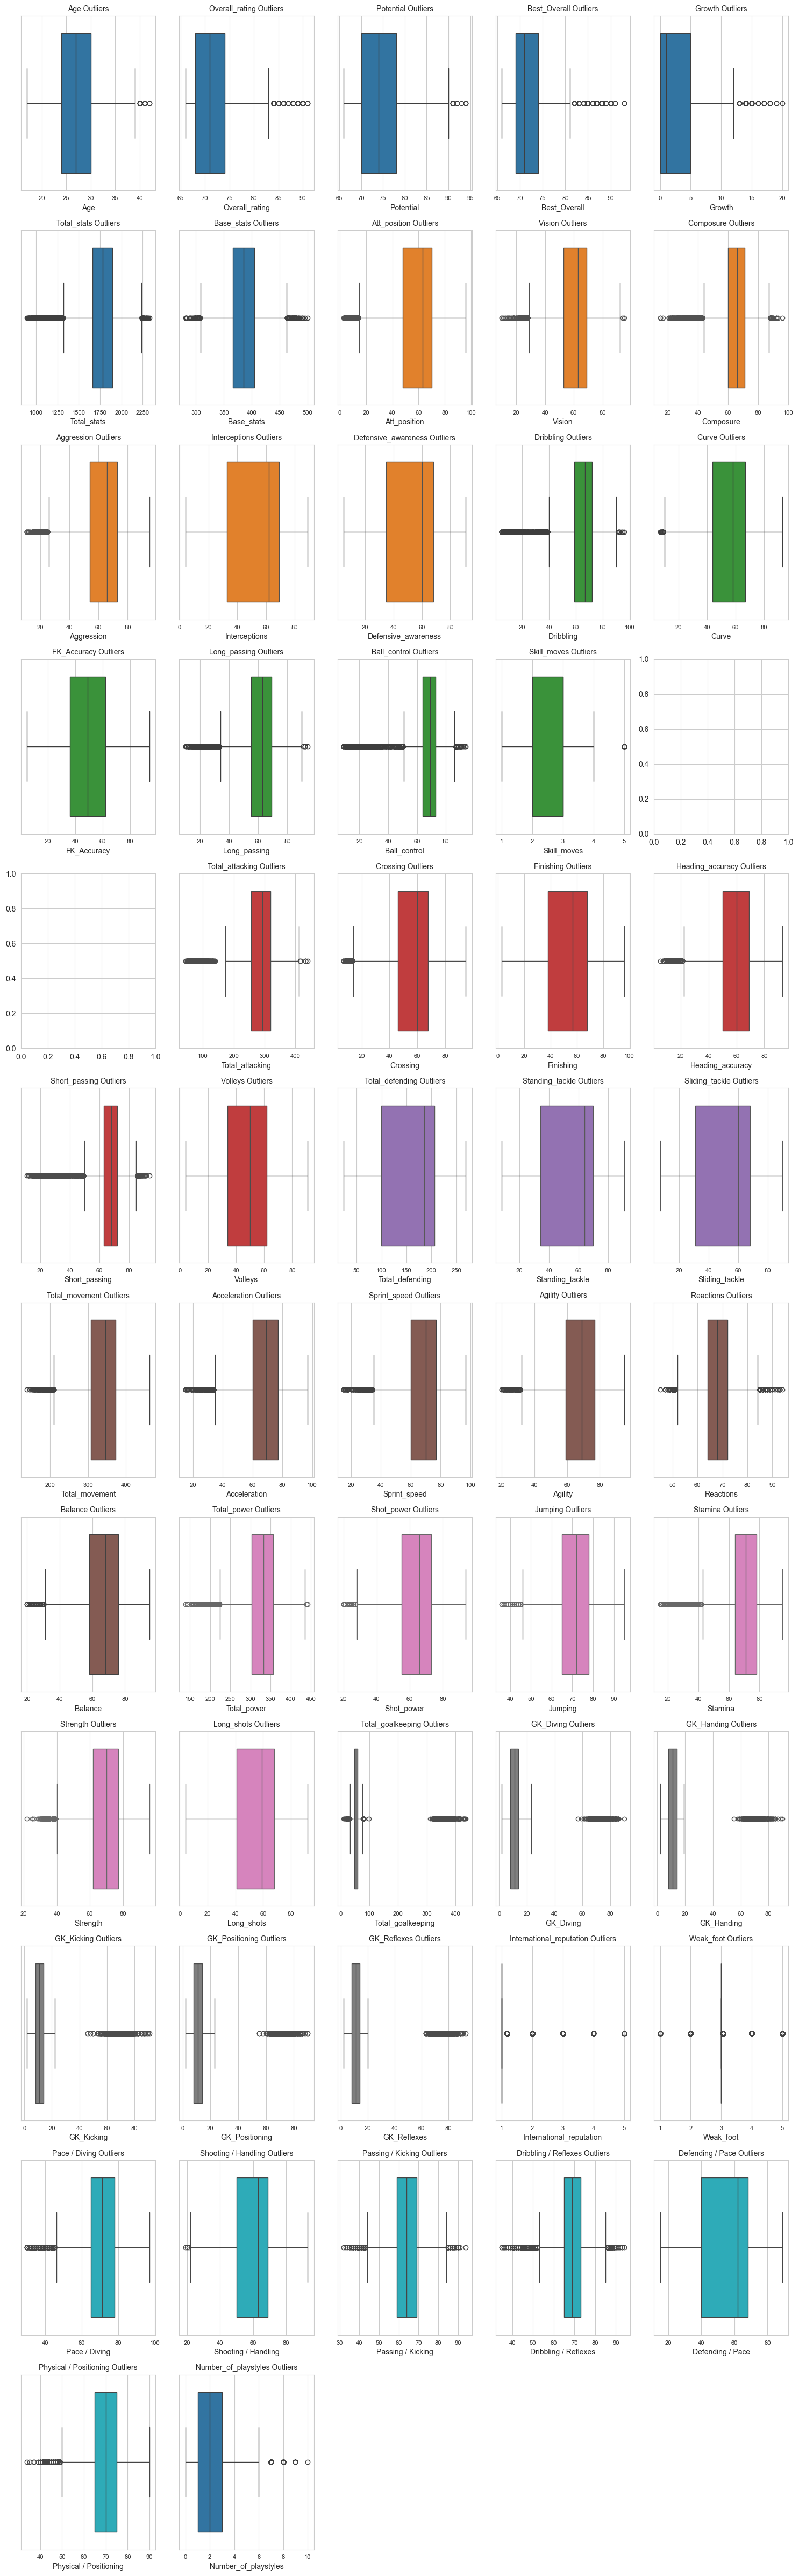

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data


# Feature groups as per your request
feature_groups = {
   'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Calculate grid dimensions dynamically based on the number of features
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break
        
        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


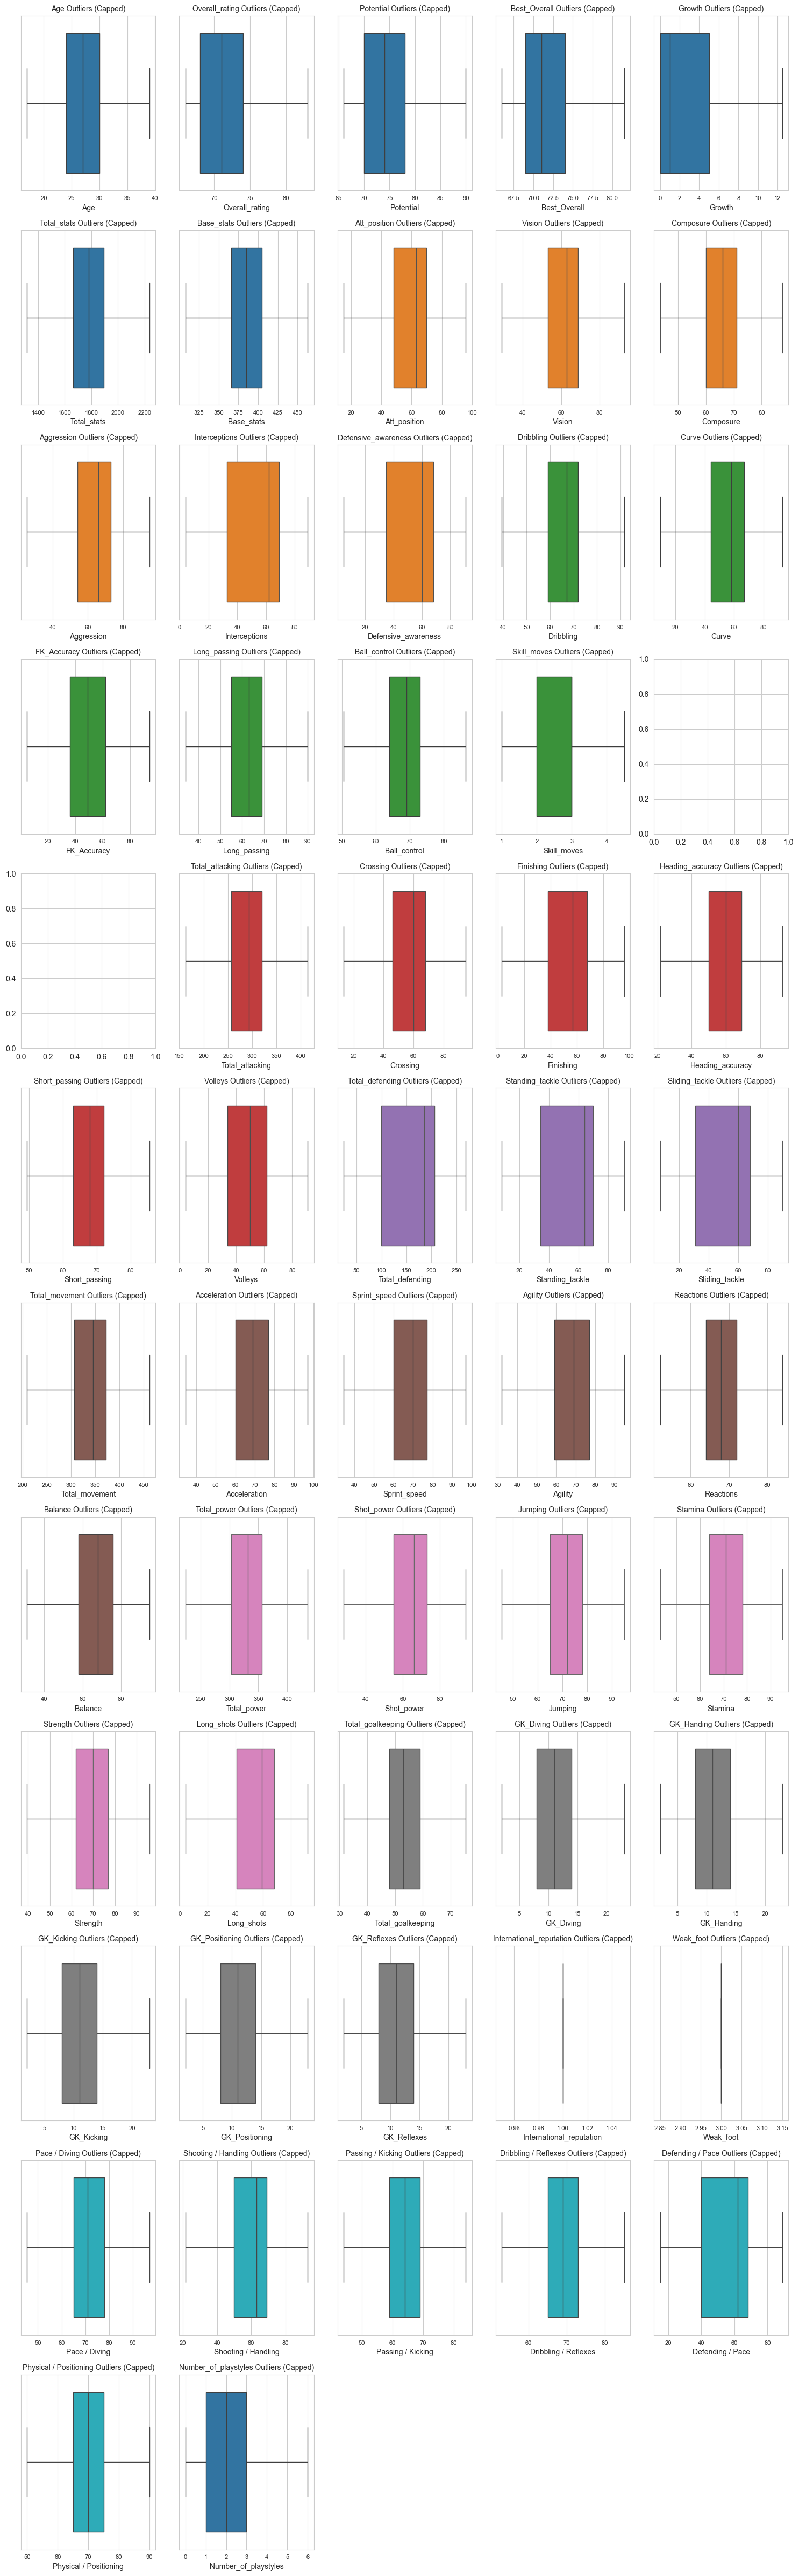

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data

# Feature groups as per your request
feature_groups = {
    'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Function for capping outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

# Apply capping to outliers for each feature
for feature in all_features:
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        df = cap_outliers(df, feature)

# Replot the boxplots after capping outliers
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break
        
        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers (Capped)', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [16]:
# Check for duplicated column names
duplicated_columns = df.columns[df.columns.duplicated()].unique()

# Display the duplicated columns
print(f"Duplicated columns: {duplicated_columns}")

# If you want to drop duplicated columns (keeping the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

# Verify the columns after dropping duplicates
print(f"Columns after removing duplicates: {df.columns}")


Duplicated columns: Index([], dtype='object')
Columns after removing duplicates: Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Sk

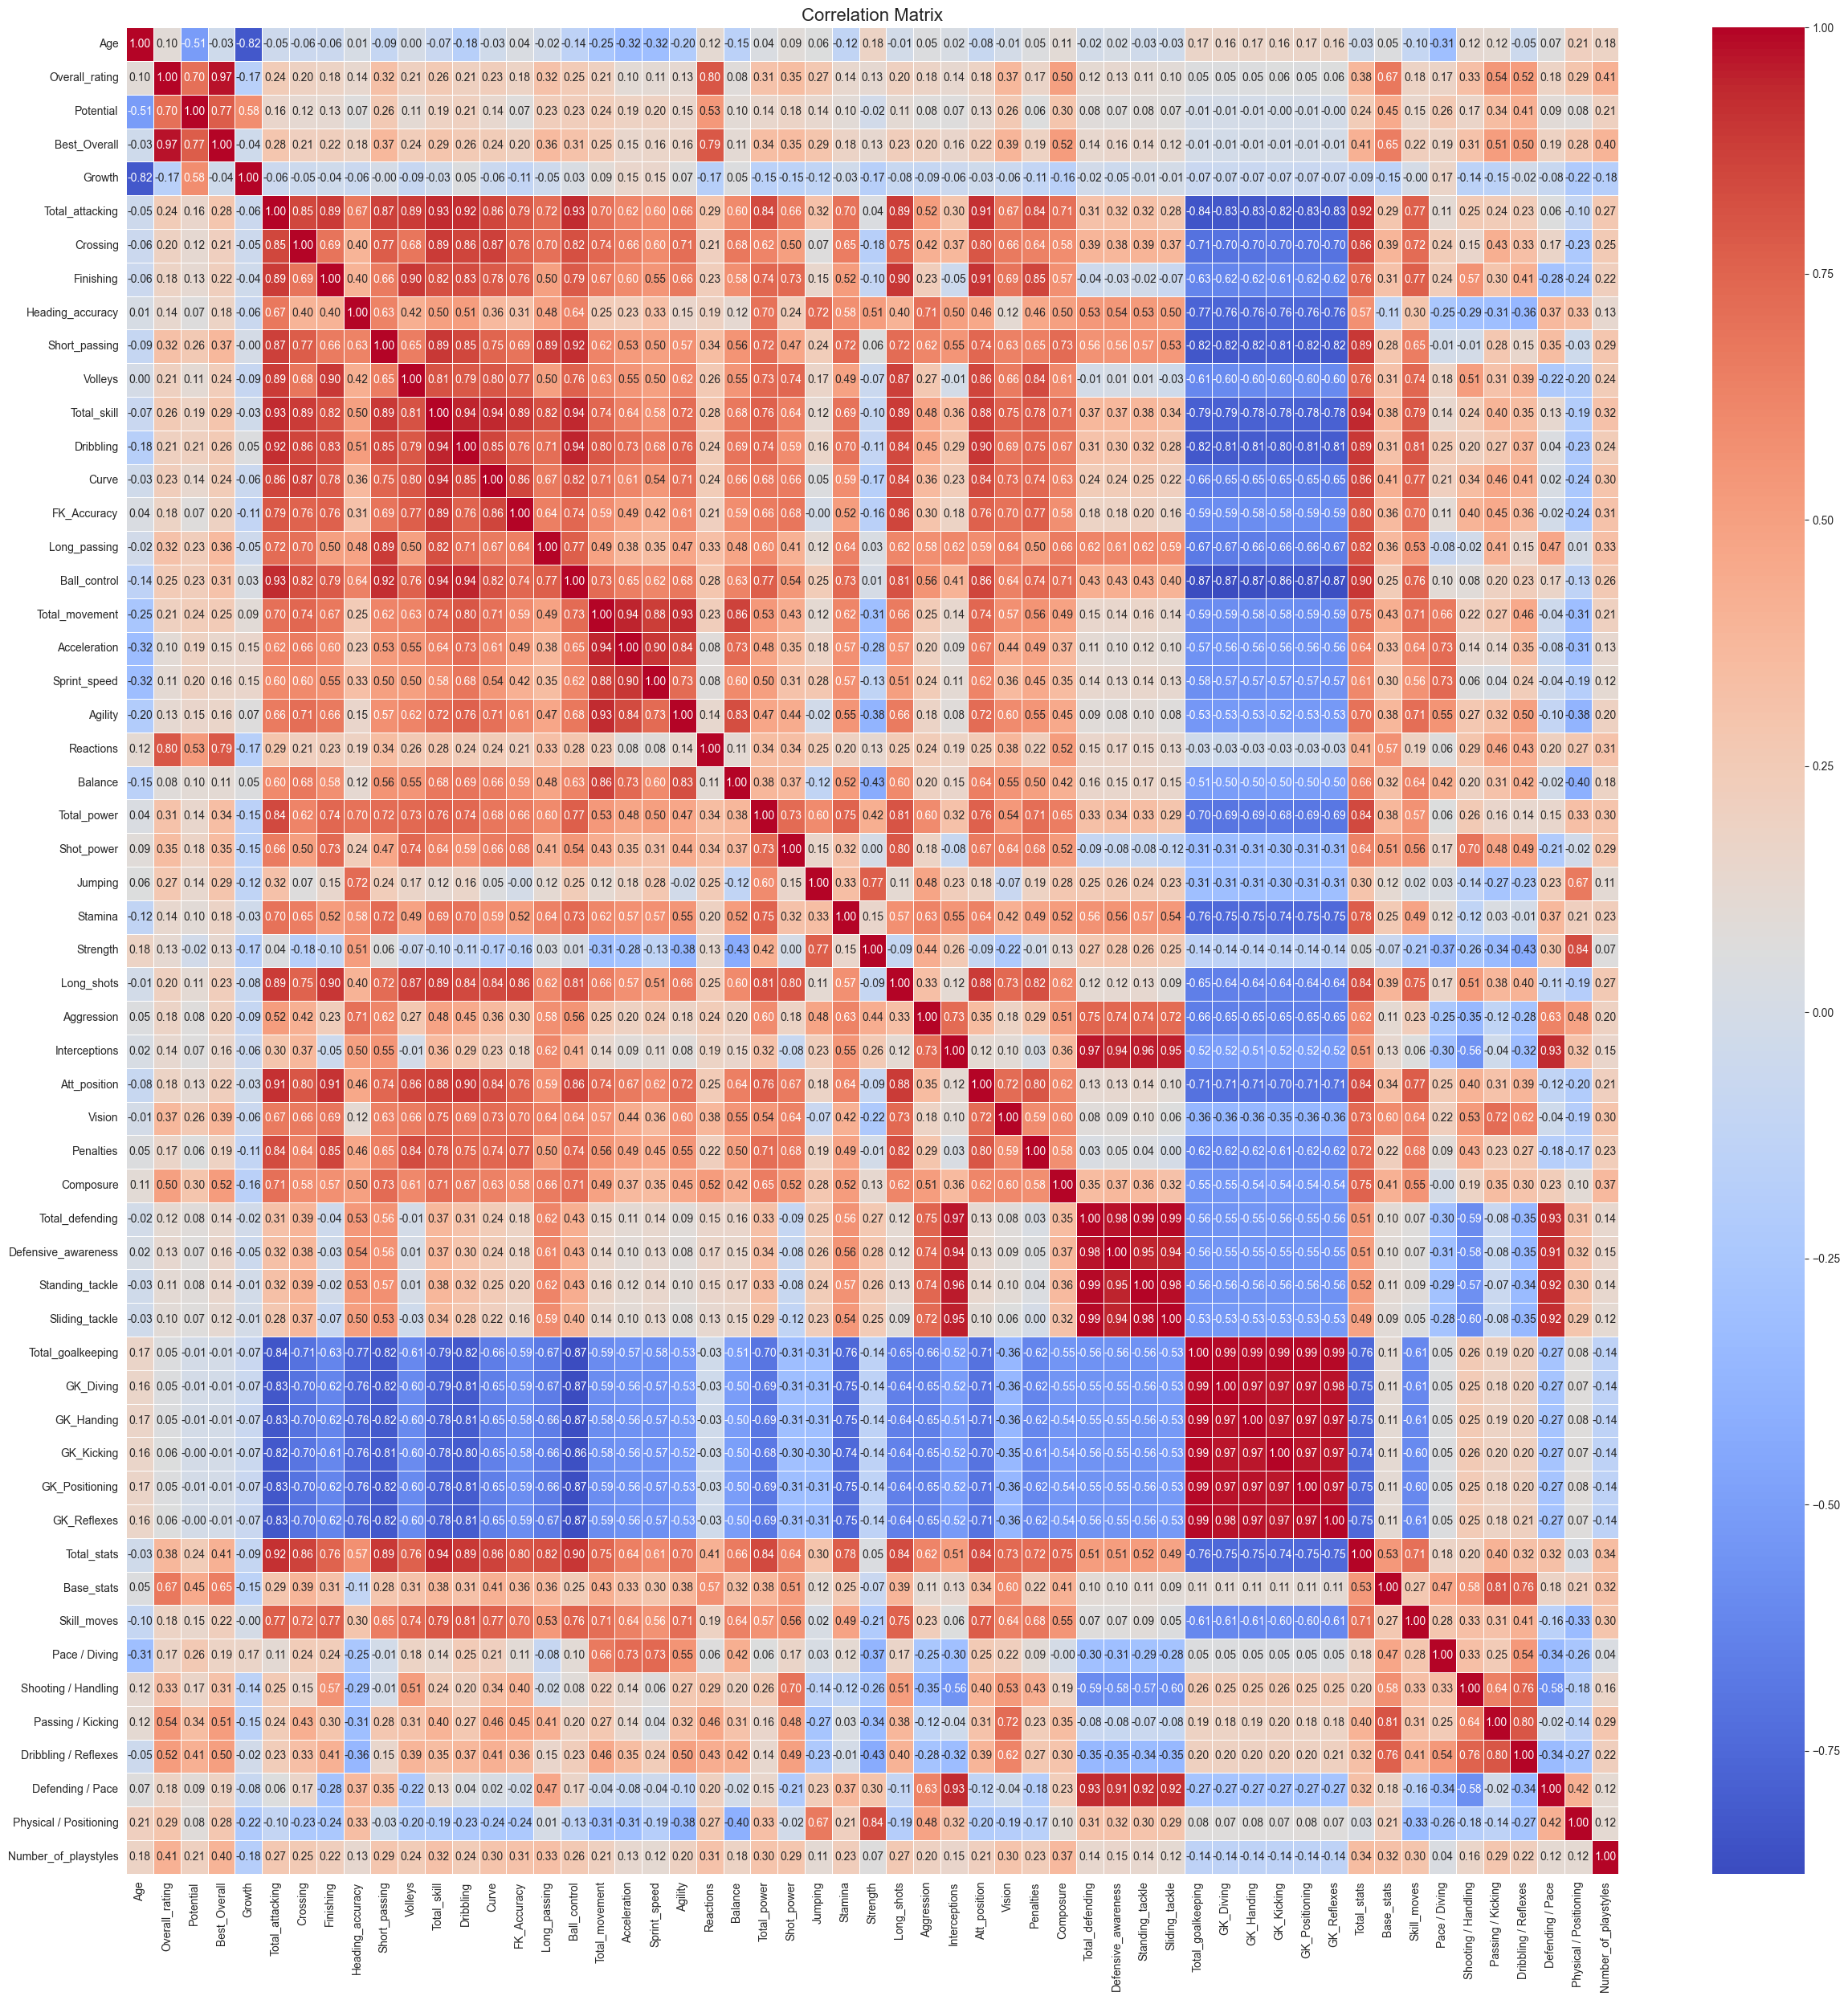

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Drop 'International_reputation' and 'Weak_foot' from the numeric columns
numeric_df = numeric_df.drop(columns=['International_reputation', 'Weak_foot'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

# Your feature groups containing categorical features
feature_groups = {
    'Player Info': ['Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Flatten the list of categorical features
categorical_features = [feat for feats in feature_groups.values() for feat in feats]

# Label encoding for categorical features
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    if feature in df.columns:
        df[feature] = label_encoder.fit_transform(df[feature])

# Show a snippet of the transformed DataFrame
print(df[categorical_features].head())


   Height  Weight  Foot  Best_Position  Team&Contract  Joined  Loan_date_end  \
0      23      26     1              1            587     692              3   
1      38      45     0             14           3080     692              3   
2      25      26     1             14           3534     688              3   
3      24      26     1              4           3069     209              3   
4      31      36     1             14           1728      91              3   

   Value  Wage  Release_clause  Attacking_work_rate  Defensive_work_rate  \
0      6    88               0                    2                    2   
1     48    56             357                    0                    2   
2     47    38             347                    0                    1   
3     15    58             163                    0                    2   
4     24    22             167                    0                    0   

   Body_type  Real_face  PlayStyles  PlayStyles +  Acceleratio

In [20]:
from sklearn.preprocessing import MinMaxScaler

# If you want to normalize encoded columns (not always necessary for categorical features)
scaler = MinMaxScaler()

# Apply MinMaxScaler to scale features to the range [0, 1]
df[categorical_features] = scaler.fit_transform(df[categorical_features])
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show a snippet of the normalized DataFrame
print(df[categorical_features].head())
print(df[numerical_columns].head())


     Height  Weight  Foot  Best_Position  Team&Contract    Joined  \
0  0.489362    0.52   1.0       0.071429       0.108263  0.480556   
1  0.808511    0.90   0.0       1.000000       0.568056  0.480556   
2  0.531915    0.52   1.0       1.000000       0.651789  0.477778   
3  0.510638    0.52   1.0       0.285714       0.566027  0.145139   
4  0.659574    0.72   1.0       1.000000       0.318702  0.063194   

   Loan_date_end     Value      Wage  Release_clause  Attacking_work_rate  \
0           0.75  0.025862  0.666667        0.000000                  1.0   
1           0.75  0.206897  0.424242        0.442379                  0.0   
2           0.75  0.202586  0.287879        0.429988                  0.0   
3           0.75  0.064655  0.439394        0.201983                  0.0   
4           0.75  0.103448  0.166667        0.206939                  0.0   

   Defensive_work_rate  Body_type  Real_face  PlayStyles  PlayStyles +  \
0                  1.0   0.444444        0.0    

In [21]:
df.head()

Age  Overall_rating  Potential  Team&Contract    Height  Weight  Foot  \
0  0.399098        0.214133   0.294310       0.108263  0.489362    0.52   1.0   
1  0.200000        1.000000   1.000000       0.568056  0.808511    0.90   0.0   
2  0.280000        1.000000   1.000000       0.651789  0.531915    0.52   1.0   
3  0.600000        1.000000   0.892857       0.566027  0.510638    0.52   1.0   
4  0.480000        0.960000   0.857143       0.318702  0.659574    0.72   1.0   

   Best_Overall  Best_Position    Growth  ...  Pace / Diving  \
0      0.228774       0.071429  0.144367  ...       0.597891   
1      1.000000       1.000000  0.150000  ...       0.880597   
2      1.000000       1.000000  0.150000  ...       1.000000   
3      0.925926       0.285714  0.000000  ...       0.626866   
4      0.888889       1.000000  0.000000  ...       0.582090   

   Shooting / Handling  Passing / Kicking  Dribbling / Reflexes  \
0             0.539378           0.508903              0.562778   
1             1.000000           0.548387              0.762712   
2             0.959459           0.774194              0.966102   
3             0.932432           1.000000              0.881356   
4             1.000000           0.838710              0.813559   

   Defending / Pace  Physical / Positioning  PlayStyles  PlayStyles +  \
0          0.544092                0.631361    0.803097      0.518519   
1          0.405405                0.964286    0.704425      0.000000   
2          0.283784                0.785714    0.239381      0.703704   
3          0.675676                0.785714    0.126991      0.370370   
4          0.459459                0.875000    0.489823      0.370370   

   Number_of_playstyles  Acceleration_type  
0                0.1884                0.5  
1                0.3000                0.5  
2                0.7000                1.0  
3                0.9000                0.0  
4                0.5000                0.5  

[5 rows x 74 columns]

In [24]:
df.columns

Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate',
       'Defensive_work_rate', 'International_r